In [47]:
from merge_sort import merge_sort
from insertion_sort import insertion_sort
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy

In [2]:
def check_time(sorting_algo, input_arr):
    start_time = time.time()
    sorting_algo(input_arr)
    end_time = time.time()

    return (end_time - start_time)

In [82]:
def generate_int_arr(count=5, seed=0):
    np.random.seed(seed)
    return list(np.random.randint(low=0, high=count, size=count))

In [83]:
def generate_real_arr(count=5, seed=0):
    np.random.seed(seed)
    return list(np.random.uniform(low=0, high=count, size=count))

In [118]:
def experiment_time(min_input_size, max_input_size, dif=10, seed=0):
    time_plot = {
        "input_size": [],
        "merge": [],
        "insertion": []
    }
    inflection_n = None
    inflection_time = None

    for count in range(min_input_size, max_input_size, dif):
        input_arr = generate_int_arr(count, seed)
        input_arr_merge = copy.deepcopy(input_arr)
        input_arr_insertion = copy.deepcopy(input_arr)
        time_plot["input_size"].append(count)
        merge_time = check_time(merge_sort, input_arr_merge)
        insertion_time = check_time(insertion_sort, input_arr_insertion)
        time_plot["merge"].append(merge_time)
        time_plot["insertion"].append(insertion_time)

    
    for i in reversed(range(len(time_plot["input_size"]))):
        if(time_plot["merge"][i] > time_plot["insertion"][i]):
            inflection_n = time_plot["input_size"][i+1]
            inflection_time = time_plot["merge"][i+1]
            break
        
    plt.plot(time_plot["input_size"], time_plot["merge"], c="r", label="Merge Sort")
    plt.plot(time_plot["input_size"], time_plot["insertion"], c="b", label="Insertion Sort")
    plt.legend(loc="upper right")
    plt.xlabel("Number of elements (n)")
    plt.ylabel("Required time (in s)")
    plt.title("Merge Sort vs Insertion Sort")
    plt.annotate(f"n={inflection_n}", (inflection_n-13, inflection_time + 0.0002))
    plt.savefig("Time Requirement for Merge Sort and Insertion Sort.jog")
    plt.show()

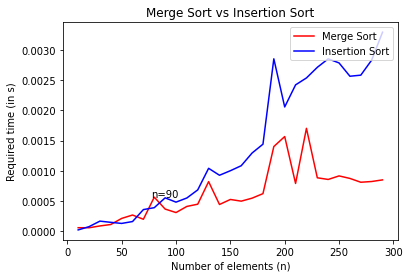

In [124]:
experiment_time(10, 300, 10, seed=2)